In [1]:
from datascience import *

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

import graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [70]:
# Load data set 
data = Table.read_table('data_stopwords_removed.csv', sep=',')
# Prepare data
data_X = list(data['text'])
data_y = list(data['label'])

In [71]:
data

text,label
rt @janemere: breakfast. #kingsman table manner scene ev ...,0
rt @tfboys_thfans: #junkai # kingsman 2 : golden circle_,1
review: kingsman partner statesman located kentucky ever ...,0
--kingsman spoilers-- merlin's end greatest character de ...,0
24. kingsman. el c rculo de oro. https://t.co/0jxevtjvxh,0
ye olde cock tavern fleet st london. photo veronik. | #a ...,0
infilmercials - kingsman: secret service: https://t.co/x ...,0
gust un video de @youtube https://t.co/g9nhiz4wx1 kingsm ...,0
rt @meganmoviegirl: halle berry pedro pascal tease roman ...,0
oh kingsman 2 dumb lit,0


In [72]:
# Cross validation
clf = Pipeline([('vect', CountVectorizer()), 
                ('clf', tree.DecisionTreeClassifier(max_depth=3))])

scoring = ['precision_weighted', 'recall_weighted', 'f1_weighted']
scores = cross_validate(clf, data_X, data_y, scoring=scoring, cv=5, return_train_score=False)

print('Weighted average precision: ', np.mean(scores['test_precision_weighted']))
print('Weighted average recall: ', np.mean(scores['test_recall_weighted']))
print('Weighted average f1 score:', np.mean(scores['test_f1_weighted']))

Weighted average precision:  0.783229619104
Weighted average recall:  0.795638488076
Weighted average f1 score: 0.781974175233


In [64]:
# Use train-test split to fit a classifier for tree plot
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=.20, random_state=0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

clf2 = tree.DecisionTreeClassifier(max_depth=3, criterion='entropy')
clf2.fit(X_train_counts, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

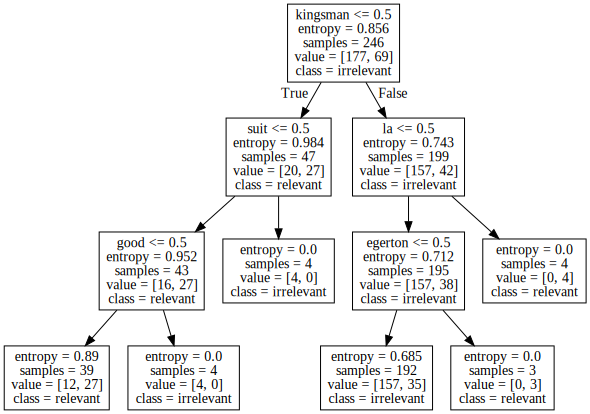

In [65]:
# Inline plot of tree
dot_data = tree.export_graphviz(clf2, out_file=None, 
                                feature_names=count_vect.get_feature_names(),
                                class_names=['irrelevant', 'relevant'])
graph = graphviz.Source(dot_data)
graph

In [66]:
# Plot tree to pdf
graph.render('tree_stopwords_removed_URLs_replaced')

'tree_stopwords_removed_URLs_replaced.pdf'